# LAB2 CI2024

## TSP instance generator

In [338]:
PYTHONOPTIMIZE=1

In [339]:
import numpy as np
import pandas as pd
from icecream import ic
from geopy.distance import geodesic
import networkx as nx
from itertools import combinations, islice

from matplotlib import pyplot as plt
from tqdm.auto import tqdm
from dataclasses import dataclass

In [340]:
vanuatu = pd.read_csv("cities\\vanuatu.csv", names = ['city', 'lat', 'lon'])
china = pd.read_csv("cities\\china.csv", names = ['city', 'lat', 'lon'])
usa = pd.read_csv("cities\\us.csv", names = ['city', 'lat', 'lon'])
russia = pd.read_csv("cities\\russia.csv", names = ['city', 'lat', 'lon'])
italy = pd.read_csv("cities\\italy.csv", names = ['city', 'lat', 'lon'])

In [ ]:
cities = china
names = cities['city'].values

# pyplot = plt.scatter(cities['lat'], cities['lon'])
# for _ in cities:
#     list = cities[['lat', 'lon']].values
# points = np.array(list)
# personal shits
# centroid = np.mean(points, axis=0)
# pyplot = plt.scatter(centroid[0], centroid[1], c='red')

In [312]:
def geo_distance(x1, y1, x2, y2):
    return geodesic((x1, y1), (x2, y2)).km

def trip_visualization(trip):
    if trip[-1] != trip[0]:
        trip = np.concatenate((trip, [trip[0]]))
    latitudes = cities.iloc[trip]['lat']
    longitudes = cities.iloc[trip]['lon']
    
    plt.figure(figsize=(10, 16))
    plt.plot(longitudes, latitudes, marker='o') 
    for idx in range(len(cities)):
        plt.text(cities.iloc[idx]['lon'], cities.iloc[idx]['lat'], cities.iloc[idx]['city'], fontsize=12)
    plt.title("Trip Route")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True)
    return plt.show()


In [334]:
distance_matrix = np.zeros((cities.shape[0], cities.shape[0]))
for i in tqdm(range(cities.shape[0])):
    for j in range(cities.shape[0]):
        distance_matrix[i, j] = geo_distance(cities.iloc[i, 1], cities.iloc[i, 2], cities.iloc[j, 1], cities.iloc[j, 2])

## Gready simple approach

Trip to visit all cities:

Ancona -> Rimini (90.60)
Rimini -> Forlì (46.72)
Forlì -> Ravenna (26.46)
Ravenna -> Ferrara (66.67)
Ferrara -> Bologna (43.43)
Bologna -> Modena (37.29)
Modena -> Reggio nell'Emilia (23.94)
Reggio nell'Emilia -> Parma (26.94)
Parma -> Piacenza (57.65)
Piacenza -> Milan (60.65)
Milan -> Monza (14.51)
Monza -> Bergamo (33.92)
Bergamo -> Brescia (46.02)
Brescia -> Verona (61.42)
Verona -> Vicenza (44.70)
Vicenza -> Padua (30.13)
Padua -> Venice (36.07)
Venice -> Trieste (115.09)
Trieste -> Bolzano (209.68)
Bolzano -> Trento (49.94)
Trento -> Novara (206.69)
Novara -> Turin (84.46)
Turin -> Genoa (123.19)
Genoa -> Leghorn (146.37)
Leghorn -> Prato (74.02)
Prato -> Florence (17.17)
Florence -> Perugia (119.19)
Perugia -> Terni (63.64)
Terni -> Rome (76.54)
Rome -> Latina (56.84)
Latina -> Giugliano in Campania (124.45)
Giugliano in Campania -> Naples (11.15)
Naples -> Salerno (46.25)
Salerno -> Foggia (109.52)
Foggia -> Andria (67.42)
Andria -> Bari (50.18)
Bari 

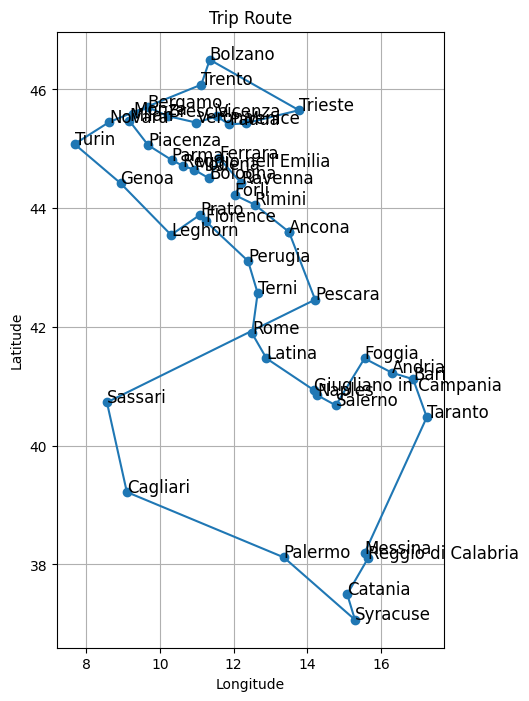

In [ ]:
def find_kth_occurrence(lst, element, k):
    occurrences = (i for i, x in enumerate(lst) if x == element)
    return next(islice(occurrences, k-1, k), -1)

visited = np.full((cities.shape[0]), False)
city = 0
visited[city] = True
trip = []
trip.append(city)
cost = 0
print("Trip to visit all cities:\n")

# Prof version
# dist = distance_matrix.copy()
# while not np.all(visited):
#     dist[:, city] = np.inf
#     closest_city = np.argmin(dist[city])
#     print(f"{names[city]} -> {names[closest_city]} ({dist[city, closest_city]:.2f})")
#     city = closest_city
#     visited[city] = True
#     trip.append(city)
# trip.append(0)

# using a mask ( i defined a TF table to understand the logic):
    # a = distance_matrix[0]
    # b = visited
    # s = np.logical_and(a, np.logical_not(b))
    # index = np.min(a[s]) -> now i find in the support the index of the k-instance of 1, incremented by 1 cause of the first city is 0

while not np.all(visited):
    # visited = np.array(visited, dtype=bool)
    # support = np.logical_and(distance_matrix[city], np.logical_not(visited))
    support = np.logical_not(visited)
    k = np.argmin(distance_matrix[city][support])
    closest_city = find_kth_occurrence(support, 1, k+1)
    print(f"{names[city]} -> {names[closest_city]} ({distance_matrix[city][closest_city]:.2f})")
    city = closest_city
    visited[city] = True
    trip.append(city)
    cost += distance_matrix[trip[-2], trip[-1]]
cost += distance_matrix[trip[-1], trip[0]]
trip.append(0)

# i compute the cost inside the loop to avoid the a new loop
# trip_distance = 0
# for i in range(len(trip) - 1):
#     trip_distance += distance_matrix[trip[i], trip[i + 1]]
print(f"\nTrip distance: {cost:.2f} with {len(trip)} cities visited")
trip_visualization(trip)

### Debugging


In [58]:
a = np.array([0, 2, 4, 1, 5])
b = np.array([True, False, True, False, False], dtype=bool)
k = np.argmin(a[np.logical_not(b)])
k

np.int64(1)

In [16]:
ic(distance_matrix[7])
b = [False, False, False, False, False, False, False, True]
bb = np.logical_not(b)
s = np.logical_and(distance_matrix[7], np.logical_not(b))
ic(s)
min_value = np.min(distance_matrix[7][bb])
i = np.argmin(distance_matrix[7][bb])

closest_city = find_kth_occurrence(s, 1, i+1)
ic (distance_matrix[7][closest_city], min_value)

ic| distance_matrix[7]: array([223.00475079, 206.73999706, 272.04079096, 276.07587063,
                               209.19670817, 326.69102275, 435.9113852 ,   0.        ])
ic| s: array([ True,  True,  True,  True,  True,  True,  True, False])
ic| distance_matrix[7][closest_city]: np.float64(206.73999705909532)
    min_value: np.float64(206.73999705909532)


(np.float64(206.73999705909532), np.float64(206.73999705909532))

## Second Greedy Algorithm

Once the second greedy works, we can move to a simulated annealing approach and then implementing EA
- Note: Instead of fixing this algorithm, we can directly move to the EA approach

In [8]:
def cyclic(edges):
    G = nx.Graph()
    G.add_edges_from(edges)
    try:    
        nx.find_cycle(G)
        return True
    except:
        return False   

In [12]:
# have to define combinations
segments = [
    ({c1, c2}, float(distance_matrix[c1, c2])) for c1, c2 in combinations(range(cities.shape[0]), 2)
] # list of tuples, with the start and end of each segment and their distances -> {start, end}, len
visited = set()
edges = set()

shortest_path = next(_ for _ in sorted(segments, key=lambda x: x[1]))
visited |= shortest_path[0]

edges |= {tuple(shortest_path[0])}
segments = [s for s in segments if not cyclic(edges | {tuple(s[0])})]

## Evolutionary Algorithm approach

1. Use a Greedy approach to populate the population ( instead of finding a optimal result, implement a random way of selecting the path to find some good solution as a starting point )
2. Implement Inver-over crossover ( as professor suggestion ) and try to balance it


### Greedy individual generator ( good solution, not optimal, by choice )

In [341]:
@dataclass
class Individual:
    genome: np.ndarray = None
    cost: float = None

Greedy generator

In [342]:
# to have a random picking, but with some logic,
# i implement some kind of probability of picking the shortest path or delete it and repeat the process

def find_kth_occurrence(lst, element, k):
    occurrences = (i for i, x in enumerate(lst) if x == element)
    return next(islice(occurrences, k-1, k), -1)

def find_path(closest_city, list, support, strength = 0.5, p = 1 ):
    # while np.random.rand() < strenght i repeat the process -> to have a good solution i need to set a good strenght, but not too high
    while p > strength:
        support[closest_city] = False
        # i need to set the city as "visited" to avoid to pick it again, as the shortest path
        try:
            k = np.argmin(list[support])
        except:
            break
        p = np.random.rand()
        closest_city = find_kth_occurrence(support, 1, k+1)
    return closest_city

def individual_generator(cities, distance_matrix, strength = 0.5):
    visited = np.full((cities.shape[0]), False)
    city = np.random.randint(0, cities.shape[0])
    visited[city] = True
    trip = []
    trip.append(city)
    distance = 0

    while not np.all(visited):
        support = np.logical_not(visited)
        # i can also put np.logical_not(visited) into the function, but this version is more readable
        closest_city = find_path(city, distance_matrix[city], support, strength)
        # only for debugging
        # print(f"{names[city]} -> {names[closest_city]} ({distance_matrix[city][closest_city]:.2f})")
        city = closest_city
        visited[city] = True
        trip.append(city)
        distance += distance_matrix[trip[-2], trip[-1]]
    distance+= distance_matrix[trip[-1], trip[0]]
    return Individual(trip, distance)

# try to generate a random individual
# individual = individual_generator(cities, distance_matrix)



### Utility functions

In [ ]:
# Parent selection
def parent_selection(population):
    parents = sorted(np.random.choice(population, 2), key=lambda x: x.cost, reverse=True)
    return parents[0]

def distance_computation(trip):
    distance = 0
    for i in range(len(trip) - 1):
        distance += distance_matrix[trip[i], trip[i + 1]]
    distance += distance_matrix[trip[-1], trip[0]]
    return distance

# Crossover ( Inver-Over)
def rearrange(arr, start):
    new_arr = np.zeros_like(arr)
    len = arr.shape[0]

    for i in range(len):
        new_arr[(start + i) % len] = arr[i]

    return Individual(new_arr, distance_computation(new_arr))

def crossover(p1: Individual, p2: Individual):
    gene1 = np.concatenate((p1.genome, p1.genome))
    gene2 = p2.genome

    i = np.random.randint(0, len(p1.genome))
    j = np.where(gene2 == gene1[i])[0][0]

    gene1 = gene1[i:i + len(gene2)]
    index = (j + 1) % len(gene2)
    z = np.where(gene1 == gene2[index])[0][0]
    slice_ = gene1[1:z][::-1]
    new_gene = np.concatenate(([gene1[0], gene1[z]], slice_, gene1[z + 1:]))

    return rearrange(new_gene, i)

# Mutation ( inversion )
def mutation(p: Individual):
    gene = p.genome.copy()
    i, j = np.random.choice(range(len(gene)), 2, replace=False)
    gene[i], gene[j] = gene[j], gene[i]
    return Individual(gene, distance_computation(gene))

# Genetic operator
def genetic_operator(population):
    p = np.random.rand()
    if p < 0.3:
        # print("Crossover")
        p1 = parent_selection(population)
        p2 = parent_selection(population)
        return crossover(p1, p2)
    elif p < 0.6:
        # print("Mutation")
        p = parent_selection(population)
        return mutation(p)
    else:
        # print("Crossover + Mutation")
        p1 = parent_selection(population)
        p2 = parent_selection(population)
        return crossover(mutation(p1), mutation(p2))

def fitness(solution):
    return (solution.cost)

def population_generator(cities, distance_matrix, population_size, strength = 0.5):
    population = []
    for _ in range(population_size):
        population.append(individual_generator(cities, distance_matrix, strength))
    return population



In [351]:
POPULATION_SIZE = 500
STRENGTH = 0.5
# population = ( genome = trip (list), cost = distance (float) ), class Individual
population = population_generator(cities, distance_matrix, POPULATION_SIZE, STRENGTH)

In [352]:
OFFSPRING_SIZE = 300
GENERATIONS = 30_000

for _ in tqdm(range(GENERATIONS)):
    offspring = []
    for _ in range(OFFSPRING_SIZE):
        offspring.append(genetic_operator(population))
    # steady state
    population.extend(offspring)
    # simple survival selection
    population = sorted(population, key=lambda x: x.cost)
    population = population[:POPULATION_SIZE]

ic(population[0].cost)

  0%|          | 0/30000 [00:00<?, ?it/s]

ic| population[0].cost: np.float64(59535.568292948636)


np.float64(59535.568292948636)

- POPULATION_SIZE = 400, OFFSPRING_SIZE = 250, GENERATIONS = 5_000 -> cost: np.float64(68906.6355434113)
- POPULATION_SIZE = 400, OFFSPRING_SIZE = 250, GENERATIONS = 10_000 -> cost: np.float64(67645.07434829083)
- POPULATION_SIZE = 500, OFFSPRING_SIZE = 300, GENERATIONS = 30_000 -> cost: np.float64(67645.07434829083)
- POPULATION_SIZE = 100, OFFSPRING_SIZE = 50, GENERATIONS = 100_000 -> cost: np.float64(64975.95480391753)

note: takeover time bigger enough to let some random point survive and generate a global optima

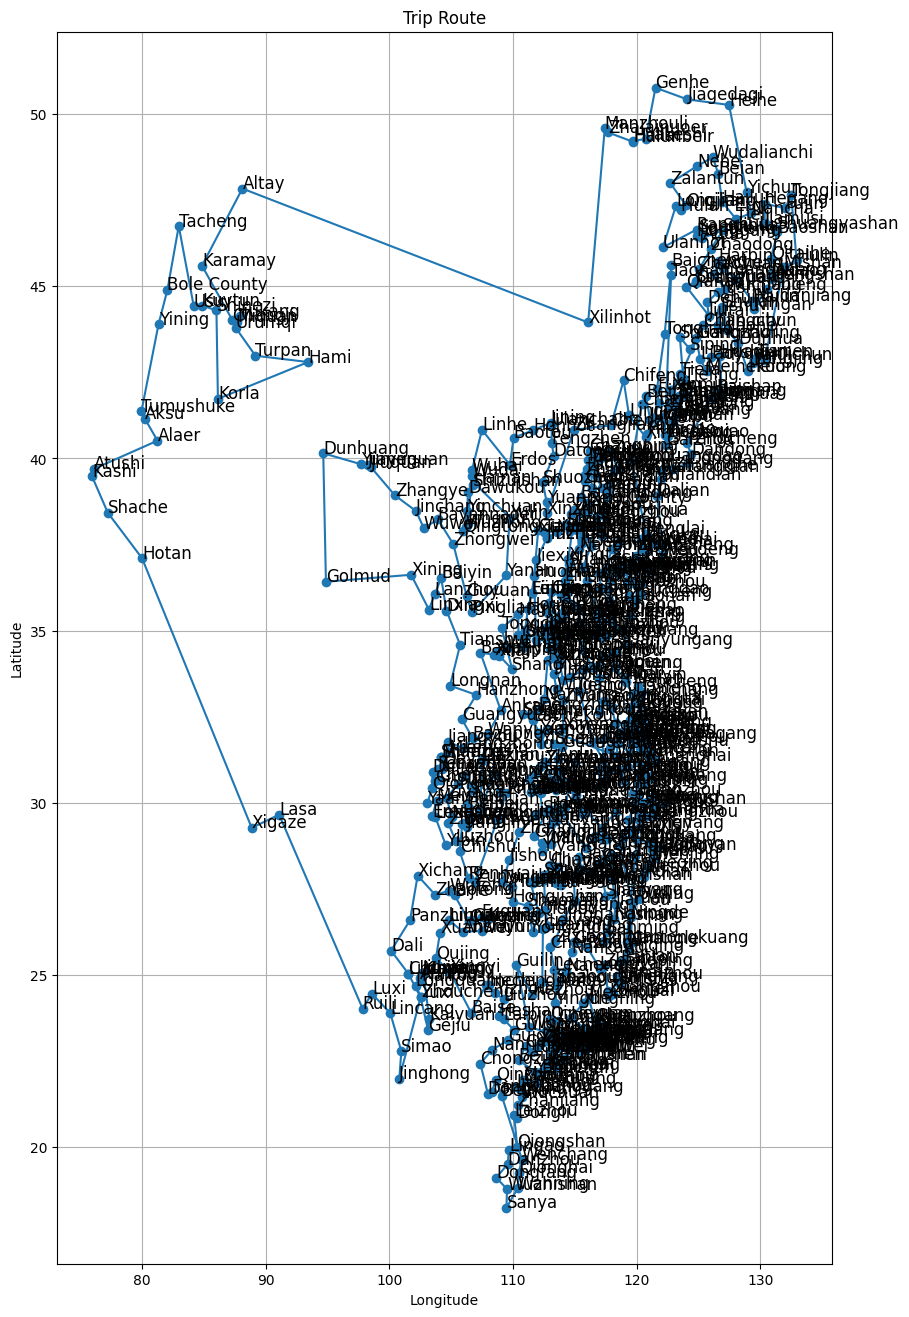

In [353]:
trip_visualization(population[0].genome)

### Debugging

In [248]:
a = np.array([0, 2, 4, 5, 1, 3])
b = np.array([2, 0, 3, 5, 1, 4])
# 0, 2, 4, 1, 5, 3, 0, 2, 4, 1, 5, 3 -> 5, 3, 0, 2, 4, 1 -> 5, 1, 4, 2, 0, 3 -> rearrange into 4, 2, 0, 3, 5, 1
# + index+1:
ic(crossover(Individual(a), Individual(b)))
ic(mutation(Individual(a)))


ic| crossover(Individual(a), Individual(b)): Individual(genome=array([5, 4, 2, 0, 1, 3]),
                                                        cost=np.float64(1264.8099487934717))
ic| mutation(Individual(a)): Individual(genome=array([0, 4, 2, 5, 1, 3]),
                                        cost=np.float64(1335.0366395528554))


Individual(genome=array([0, 4, 2, 5, 1, 3]), cost=np.float64(1335.0366395528554))

In [259]:
a = [0, 7, 1, 4, 3, 5, 2, 6, 0]
cost = distance_computation(a)
ic(cost)
new_individual = genetic_operator(population)
# need to define a cost for the new individual -> it will require a new function to compute the cost
ic(new_individual)

ic| cost: np.float64(1475.528091104531)
ic| new_individual: Individual(genome=array([2, 5, 3, 0, 4, 1, 7, 6]),
                               cost=np.float64(1899.6520210216897))


Crossover


Individual(genome=array([2, 5, 3, 0, 4, 1, 7, 6]), cost=np.float64(1899.6520210216897))